## Central Limit Theorem

In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [2]:
import distributions

In [3]:
# build a list of all the distributions
all_distributions_dict = dict([(name, cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)])
all_distributions_list = [(cls) for name, cls in distributions.__dict__.items() if isinstance(cls, type)]

In [8]:
dist = distributions.Dist_kc90_2()

In [9]:
rvs = dist.rvs(100000)

In [10]:
rvs.shape

(100000,)

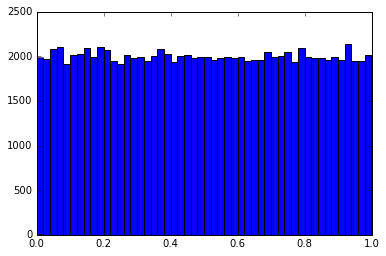

In [11]:
_ = plt.hist(rvs, bins=50)

In [12]:
from scipy.stats import norm

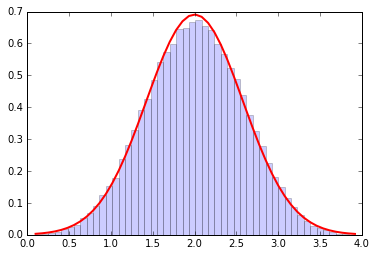

In [13]:
N = 4
n_samples = 100000
q = np.zeros(n_samples)
var_q = 0.
mean_q = 0.

for i in range(N):
    q = q+dist.rvs(n_samples)
    var_q = var_q + dist.std()**2
    mean_q = mean_q + dist.mean()

std_q = np.sqrt( var_q )


counts, bins, patches = plt.hist(q,bins=50, normed=True, alpha=.2)
plt.plot(bins, norm.pdf(bins,loc=mean_q, scale=std_q), lw=2, c='r')



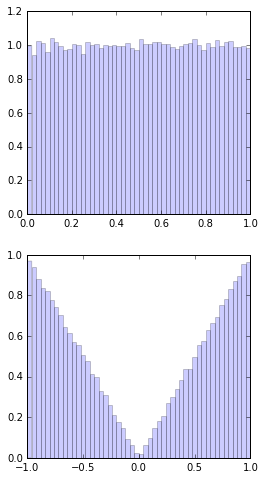

In [14]:
fig = plt.figure(figsize=plt.figaspect(2.))
for i, cls in enumerate(all_distributions_list):
    dist = cls()
    rvs = dist.rvs(100000)
    ax = fig.add_subplot(len(all_distributions_list),1,i+1)
    _ = ax.hist(rvs, bins=50, normed=True, alpha=0.2)